In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
moviesDatasetPath = 'D:/Data Mining/CA/2/movies.csv'
ratingsDatasetPath = 'D:/Data Mining/CA/2/ratings.csv'

In [3]:
movies_df = pd.read_csv(moviesDatasetPath)
ratings_df = pd.read_csv(ratingsDatasetPath)

# Preprocessing

showing first five rows 

In [4]:
print(ratings_df.head())
movies_df.head()

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Missing values

In [5]:
print(movies_df.isna().sum(),'\n')
print(ratings_df.isna().sum())

movieId    0
title      0
genres     0
dtype: int64 

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


We could also add a new column for the release date and split the title column into two columns. In addition, the genres column can be converted into several one-hot encoded columns.

## Merging Two Datasets

Ratings and movies datasets need to be combined.(like joining in SQL)

For this, the merge method is applied. Since we don't need movies that are not rated, we use the inner join on movieId. Otherwise, we should have used the right outer join.

In [6]:
df = ratings_df.merge(movies_df, on='movieId', how='inner') 
df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


## Removing Infrequent Movies
First, we count the number of users, which is the same as the number of transactions (610). Then we calculate the minimum support count. The 0.1 is chosen for the relative support threshold considering the threshold in the following questions.

Then we count the number of ratings for each movie by using the groupby method (we could also use value_counts), and filter movies that don't satisfy the minimum support constraint. 

In [7]:
num_users = ratings_df['userId'].nunique()
min_support = int(0.1 * num_users)
min_support

61

In [8]:
movies_num_ratings = df.groupby('movieId',as_index=False)['userId'].count() 
frequent_movieIds = list(movies_num_ratings[movies_num_ratings['userId'] >= min_support]['movieId'])
df = df[df['movieId'].isin(frequent_movieIds)]
df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
74662,597,786,1.0,941729984,Eraser (1996),Action|Drama|Thriller
74663,599,786,2.0,1498511142,Eraser (1996),Action|Drama|Thriller
74664,602,786,4.0,840876188,Eraser (1996),Action|Drama|Thriller
74665,608,786,3.0,1117666275,Eraser (1996),Action|Drama|Thriller


In [9]:
print("before: ", len(movies_df))
print("after: ", df['movieId'].nunique())

before:  9742
after:  328


After removing infrequent movies, the number of unique movies reduced from 9742 to only 328. Also, around 65000 rows were removed from the dataset (65%).


## Visualization 
We plot the number of ratings per movie for 50 movies that have highest number of votes.

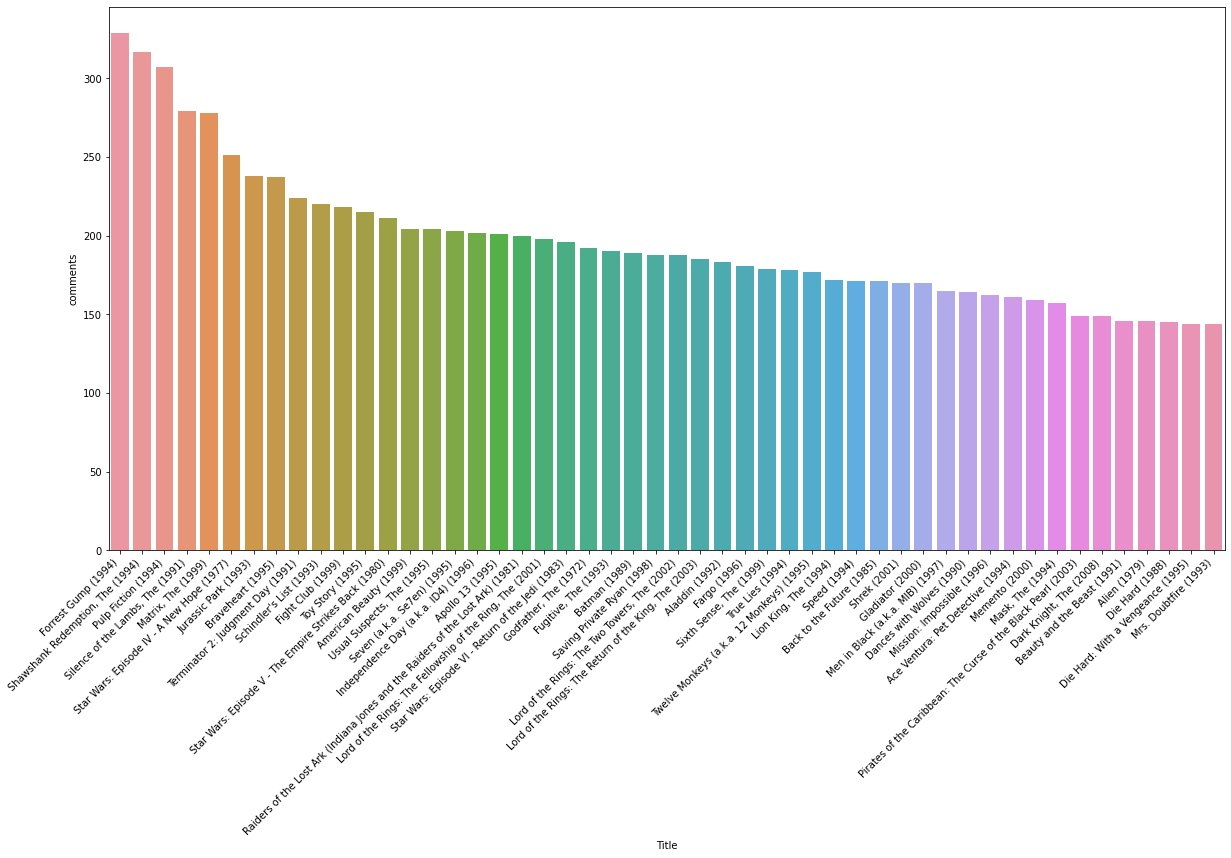

In [10]:
frequent_movies = df['title'].value_counts().nlargest(n = 50)
fig,ax = plt.subplots(figsize = (20,10))
fig = sns.barplot(x = frequent_movies.keys(), y = frequent_movies.values, ax=ax)
ax.set(xlabel='Title', ylabel='comments') 
x_title = frequent_movies.keys()
plot = ax.set_xticklabels(labels=x_title, rotation=45, ha='right')


We also plot how many movies have certain number of votes. This is after removing infrequent movies.

Text(0, 0.5, 'Num of Movies')

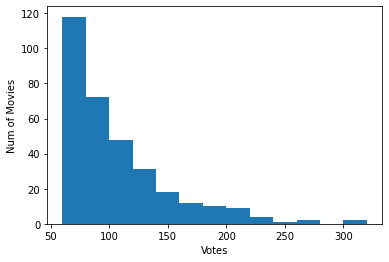

In [11]:
plt.hist(x = df['movieId'].value_counts(),bins=range(60,340,20))
plt.xlabel("Votes",loc='center')
plt.ylabel("Num of Movies")

# 2

Number of comments

For counting comments per movie, we can use value_counts, which we have previously computed for deleting infrequent movies. Also, the total number of comments is equal to the number of records in the dataframe.

In [12]:
print("Total: ", len(df))
movies_num_ratings

Total:  34660


,movieId,userId
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49
...,...,...
9719,193581,1
9720,193583,1
9721,193585,1
9722,193587,1


Number of uinique movies

In [13]:
print(len(movies_num_ratings['movieId']))
print("After removing infrequent: " ,df['movieId'].nunique())

9724
After removing infrequent:  328


Ten Most Voted Movies

In [14]:
df.nlargest(n = 10, columns = 'userId')

,movieId,userId
314,356,329
277,318,317
257,296,307
510,593,279
1938,2571,278
224,260,251
418,480,238
97,110,237
507,589,224
461,527,220


Number of people who rated Forrest Gump

In [15]:
df[df['title'].str.contains('Forrest Gump')]['userId']

2426      1
2427      6
2428      7
2429      8
2430     10
       ... 
2750    605
2751    606
2752    608
2753    609
2754    610
Name: userId, Length: 329, dtype: int64

# 3

In [16]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

In [47]:
users_movies = df.groupby('userId')['movieId'].apply(list)
movies_transactions = list(users_movies.values)

In [49]:
te = TransactionEncoder()
te_array = te.fit(movies_transactions).transform(movies_transactions)
transaction_df = pd.DataFrame(te_array, columns=te.columns_)
transaction_df

,1,2,6,10,11,16,17,19,21,25,...,68954,69122,70286,72998,74458,79132,89745,91529,99114,109487
0,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,True,False,False,False,True,False,True,True,False,False,...,False,False,False,True,False,False,False,False,False,False
599,True,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
600,True,True,False,True,False,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
601,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Apriori

Since there is no min_length argument in apriori method from mlxtend, we filter the output of this method to show k-itemset with k >= 2.

In [65]:
apriori_out1 = apriori(transaction_df,min_support=0.1)
indices = apriori_out1['itemsets'].apply(lambda x: len(x) >= 2)
apriori_out1[list(indices)]

,support,itemsets
328,0.112769,"(0, 1)"
329,0.114428,"(0, 3)"
330,0.172471,"(0, 10)"
331,0.139303,"(0, 11)"
332,0.164179,"(0, 14)"
...,...,...
120364,0.102819,"(96, 194, 67, 36, 134, 205, 82, 118, 125)"
120365,0.102819,"(96, 194, 67, 36, 266, 118, 280, 125, 254)"
120366,0.106136,"(194, 41, 266, 211, 52, 118, 280, 125, 254)"
120367,0.101161,"(96, 194, 67, 266, 52, 118, 280, 125, 254)"


It is worth noting that items in itemsets are not movieIds, but the column index in the transaction_df. For instance itemset (0,3) represents movieIds (1,10).

In [100]:
apriori_out1['itemsets'].apply(lambda x: set(transaction_df.columns[i] for i in x))

0                                                       {1}
1                                                       {2}
2                                                       {6}
3                                                      {10}
4                                                      {11}
                                ...                        
120364    {480, 260, 2762, 2571, 780, 589, 1196, 1240, 1...
120365    {480, 5952, 4993, 260, 2571, 780, 1196, 7153, ...
120366    {5952, 4993, 356, 296, 2571, 1196, 2959, 7153,...
120367    {480, 5952, 4993, 356, 2571, 780, 1196, 7153, ...
120368    {5952, 4993, 260, 356, 296, 2571, 1196, 2959, ...
Name: itemsets, Length: 120369, dtype: object

apriori: support : 0.1 , min_len : 2 - count: 120041

In [70]:
apriori_out2 = apriori(transaction_df, min_support = 0.2)
indices = apriori_out2['itemsets'].apply(lambda x: len(x) >= 2)
apriori_out2[list(indices)]

,support,itemsets
86,0.222222,"(0, 36)"
87,0.233831,"(0, 41)"
88,0.227197,"(0, 45)"
89,0.255390,"(0, 52)"
90,0.218905,"(0, 67)"
...,...,...
437,0.210614,"(41, 67, 52, 45)"
438,0.223881,"(41, 85, 52, 45)"
439,0.202322,"(41, 82, 67, 52)"
440,0.205638,"(41, 194, 211, 52)"


In [71]:
apriori_out3 = apriori(transaction_df, min_support = 0.3)
indices = apriori_out3['itemsets'].apply(lambda x: len(x) >= 2)
apriori_out3[list(indices)]

,support,itemsets
29,0.303483,"(20, 52)"
30,0.315091,"(36, 118)"
31,0.303483,"(194, 36)"
32,0.368159,"(41, 45)"
33,0.381426,"(41, 52)"
34,0.343284,"(41, 85)"
35,0.383085,"(52, 45)"
36,0.330017,"(85, 45)"
37,0.300166,"(194, 45)"
38,0.328358,"(67, 52)"


In [72]:
apriori_out5 = apriori(transaction_df, min_support = 0.5)
indices = apriori_out5['itemsets'].apply(lambda x: len(x) >= 2)
apriori_out5[list(indices)]

,support,itemsets


if we set the threshold too low, we may be generating many uninteresting patterns. 
For instance, when we set min_sup to 0.1, around 120000 itemsets were found.

However,if we set the threshold too high we could miss meaningful patterns like when we set min_sup to 0.5 and no 2-itemset were found.
Therefore, I choose min_sup = 0.2.

## FP-Growth

In [76]:
fp_out1 = fpgrowth(transaction_df, min_support=0.1)
indices = fp_out1['itemsets'].apply(lambda x: len(x) >= 2)
fp_out1[list(indices)]


,support,itemsets
328,0.381426,"(41, 52)"
329,0.368159,"(41, 45)"
330,0.296849,"(41, 52, 45)"
331,0.343284,"(41, 85)"
332,0.330017,"(52, 85)"
...,...,...
120364,0.102819,"(152, 96)"
120365,0.107794,"(152, 36)"
120366,0.106136,"(152, 85)"
120367,0.116086,"(152, 52)"


In [75]:
fp_out2 = fpgrowth(transaction_df, min_support=0.2)
indices = fp_out2['itemsets'].apply(lambda x: len(x) >= 2)
fp_out2[list(indices)]

,support,itemsets
86,0.381426,"(41, 52)"
87,0.368159,"(41, 45)"
88,0.296849,"(41, 52, 45)"
89,0.343284,"(41, 85)"
90,0.330017,"(52, 85)"
...,...,...
437,0.218905,"(99, 36)"
438,0.218905,"(41, 99)"
439,0.212272,"(99, 52)"
440,0.210614,"(99, 85)"


In [74]:
fp_out3 = fpgrowth(transaction_df, min_support=0.3)
indices = fp_out3['itemsets'].apply(lambda x: len(x) >= 2)
fp_out3[list(indices)]

,support,itemsets
29,0.381426,"(41, 52)"
30,0.368159,"(41, 45)"
31,0.343284,"(41, 85)"
32,0.330017,"(52, 85)"
33,0.330017,"(45, 85)"
34,0.321725,"(194, 52)"
35,0.300166,"(194, 45)"
36,0.303483,"(194, 36)"
37,0.328358,"(67, 52)"
38,0.303483,"(20, 52)"


In [73]:
fp_out5 = fpgrowth(transaction_df, min_support=0.5)
indices = fp_out5['itemsets'].apply(lambda x: len(x) >= 2)
fp_out5[list(indices)]

,support,itemsets


# 4

In [92]:
rules6 = association_rules(apriori_out3, metric="confidence", min_threshold=0.6)
rules6[['consequents','antecedents']] = rules6[['consequents','antecedents']].applymap(lambda x: set(transaction_df.columns[i] for i in x))
rules6


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,{110},{356},0.393035,0.545605,0.303483,0.772152,1.415221,0.089041,1.994288,0.483383
1,{260},{1196},0.416252,0.349917,0.315091,0.756972,2.163290,0.169438,2.674931,0.921187
2,{1196},{260},0.349917,0.416252,0.315091,0.900474,2.163290,0.169438,5.865277,0.827189
3,{2571},{260},0.461028,0.416252,0.303483,0.658273,1.581430,0.111579,1.708231,0.682152
4,{260},{2571},0.416252,0.461028,0.303483,0.729084,1.581430,0.111579,1.989440,0.629828
5,{296},{318},0.509121,0.525705,0.368159,0.723127,1.375538,0.100512,1.713043,0.556169
6,{318},{296},0.525705,0.509121,0.368159,0.700315,1.375538,0.100512,1.637986,0.575616
7,{296},{356},0.509121,0.545605,0.381426,0.749186,1.373128,0.103647,1.811678,0.553569
8,{356},{296},0.545605,0.509121,0.381426,0.699088,1.373128,0.103647,1.631305,0.598017
9,{296},{593},0.509121,0.462687,0.343284,0.674267,1.457287,0.107720,1.649552,0.639248


In [96]:
print("number of rules - confidence: 0.6: ", len(rules6))

number of rules- confidence: 0.6:  21


In [94]:
rules6.nlargest(n = 3, columns = 'lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,{260},{1196},0.416252,0.349917,0.315091,0.756972,2.16329,0.169438,2.674931,0.921187
2,{1196},{260},0.349917,0.416252,0.315091,0.900474,2.16329,0.169438,5.865277,0.827189
3,{2571},{260},0.461028,0.416252,0.303483,0.658273,1.58143,0.111579,1.708231,0.682152


In [90]:
rules = association_rules(apriori_out3, metric="confidence", min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(118),(36),0.349917,0.416252,0.315091,0.900474,2.163290,0.169438,5.865277,0.827189
1,(67),(52),0.394693,0.545605,0.328358,0.831933,1.524789,0.113012,2.703648,0.568590


In [99]:
print("confidence 0.8 - number of rules: " , len(rules))

confidence 0.8 - number of rules:  2


As we expected, fewer rules satisfy the new constraint with a higher threshold. The confidence of the rule A ⇾ B is P(B | A) or the probability of B happening after the occurrence of A.